In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
data = pd.read_csv('dataset.csv', parse_dates=['date'])
data = data.set_index('date')

In [3]:
data['2019-04-02']

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std,temp_meteo,pres_meteo,hum_meteo,wind_direction,wind_speed,precipitation,prec_amount,visibility,dew_point_temp
date,,,,,,,,,,,,,,,,,,,
2019-04-02 00:00:00,5.804000,2.891667,100264.60125,1.01375,70.91500,2.026611,0.729395,643.988619,1.594357,4.096385,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:05:00,6.453333,2.772000,100273.59000,1.00875,70.63375,1.974880,0.598092,642.861510,1.595407,4.270225,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:10:00,6.015000,2.777500,100276.52375,1.00000,70.51875,2.001031,0.626286,644.941066,1.560401,4.062557,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:15:00,5.991071,2.757857,100280.20625,0.98000,70.36750,1.696430,0.552361,645.041267,1.597503,4.176862,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:20:00,5.867500,2.703929,100281.84375,0.97125,70.20250,2.055271,0.569531,643.591465,1.600351,4.232242,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-02 23:35:00,16.971667,5.255333,100527.03875,3.74875,47.77000,7.614822,2.193313,650.333829,2.240024,6.806393,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 23:40:00,18.038000,5.139333,100525.07125,3.63875,48.15375,8.367726,1.952622,648.018155,2.266783,6.878125,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 23:45:00,16.725714,5.347857,100530.20875,3.63500,48.31500,7.153631,2.119980,649.001153,2.201117,6.800332,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4


In [4]:
data['P1'] = data.P1.interpolate()
data['P2'] = data.P2.interpolate()
data['pressure'] = data.pressure.interpolate()
data['temperature'] = data.temperature.interpolate()
data['humidity'] = data.humidity.interpolate()
data['P1_std'] = data.P1_std.interpolate()
data['P2_std'] = data.P2_std.interpolate()
data['pressure_std'] = data.pressure_std.interpolate()
data['temperature_std'] = data.temperature_std.interpolate()
data['humidity_std'] = data.humidity_std.interpolate()

In [5]:
data['precipitation'] = data.precipitation.fillna(value=0)
data['prec_amount'] = data.prec_amount.fillna(value=0)

In [6]:
prec_codes = {0:0,
              'Облака покрывали половину неба или менее в течение всего соответствующего периода': 1,
              'Облака покрывали более половины неба в течение одной части соответствующего периода и' 
              'половину или менее в течение другой части периода.': 1,
              'Облака покрывали более половины неба в течение всего соответствующего периода.': 1,
              'Снег и/или другие виды твердых осадков': 2,
              'Морось.': 2,
              'Дождь со снегом или другими видами твердых осадков': 2,
              'Гроза (грозы) с осадками или без них.': 3,
              'Ливень (ливни).': 3,
              'Дождь.': 3,  
             }
data['precipitation'] = data.precipitation.map(prec_codes)

In [7]:
data.loc[data.prec_amount == 'Осадков нет', 'prec_amount'] = 0
data.loc[data.prec_amount == 'Следы осадков', 'prec_amount'] = 0
data['prec_amount'] = data.prec_amount.astype(float)

In [8]:
data.prec_amount.value_counts()

0.0     59689
0.5      2592
0.3      2484
1.0      2124
2.0      1296
0.1       936
3.0       468
0.8       468
4.0       396
5.0       324
10.0      252
7.0       252
12.0      216
13.0      144
6.0       144
0.4       108
9.0       108
18.0       72
0.2        36
14.0       36
0.6        36
8.0        36
11.0       36
0.9        36
Name: prec_amount, dtype: int64

In [9]:
for c in data.columns:
    if data[c].isnull().values.any():
        print(c)

precipitation
visibility


In [10]:
weeks = [g for n, g in data.groupby(pd.Grouper(freq='7D'))]

In [11]:
anom_list = []
for w in weeks[:-2]:
    w['P1'] = w.P1.interpolate()
    w['P1'] = w.P1.rolling(4, min_periods=1).mean()
    freq = round(60*25/5) # 1 day
    decomp = sm.tsa.seasonal_decompose(w.P1, model='additive', freq=freq, extrapolate_trend='freq')
    q = decomp.resid.quantile(0.85)
    idx = decomp.resid[abs(decomp.resid)>q].index
    w['trend'] = decomp.trend
    w['seasonal'] = decomp.seasonal
    w['resid'] = decomp.resid
    w['anomaly'] = abs(w.resid)>q
    anomaly = w[w['anomaly']]
    anomaly['gap'] = (anomaly.index.to_series().diff()) > pd.Timedelta(10, 'm')
    l_mod = pd.to_datetime(anomaly[anomaly.gap].index)
    l_mod = l_mod.insert(0, anomaly.index[0])
    l_mod = l_mod.insert(len(l_mod), anomaly.index[-1])
    l = [anomaly[l_mod[n]:l_mod[n+1]] for n in range(0, len(l_mod)-1, 1)]
    l = [i[:-1] for i in l]
    l = [i for i in l if len(i) > 12]
    anom_list = anom_list + l

/home/anatoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


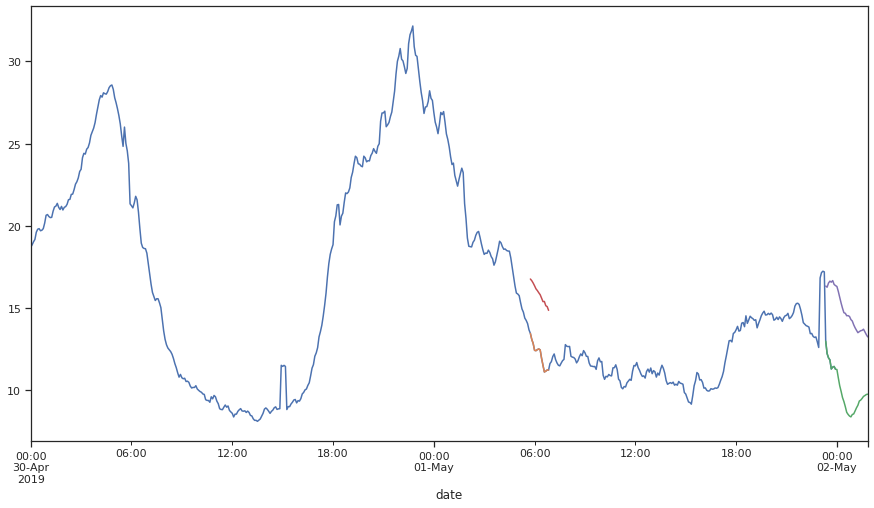

In [12]:
plt.figure(figsize=(15,8))
data['2019-04-30':'2019-05-1'].P1.plot()
anom_list[61].P1.plot()
anom_list[62].P1.plot()
(anom_list[61].trend+anom_list[61].seasonal).plot()
(anom_list[62].trend+anom_list[62].seasonal).plot()

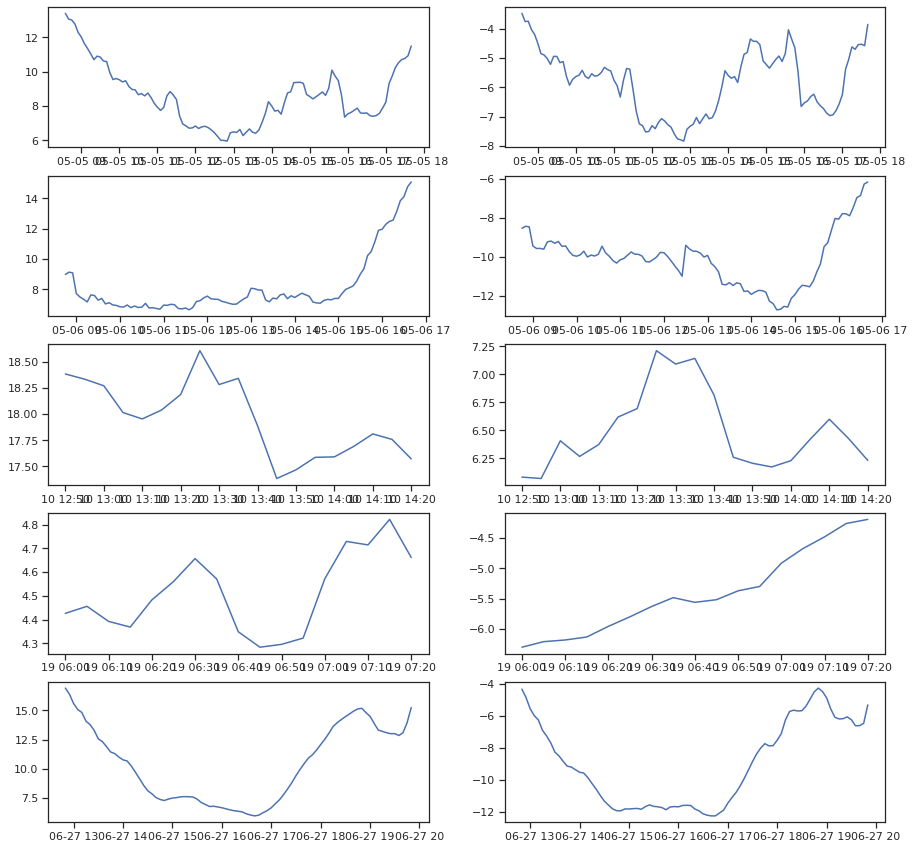

In [13]:
f, axs = plt.subplots(5,2,figsize=(15,15))
ax = 0
for i in [70, 71, 80, 91, 174]:
    axs[ax,0].plot(anom_list[i].P1)
    axs[ax,1].plot(anom_list[i].resid)
    ax += 1

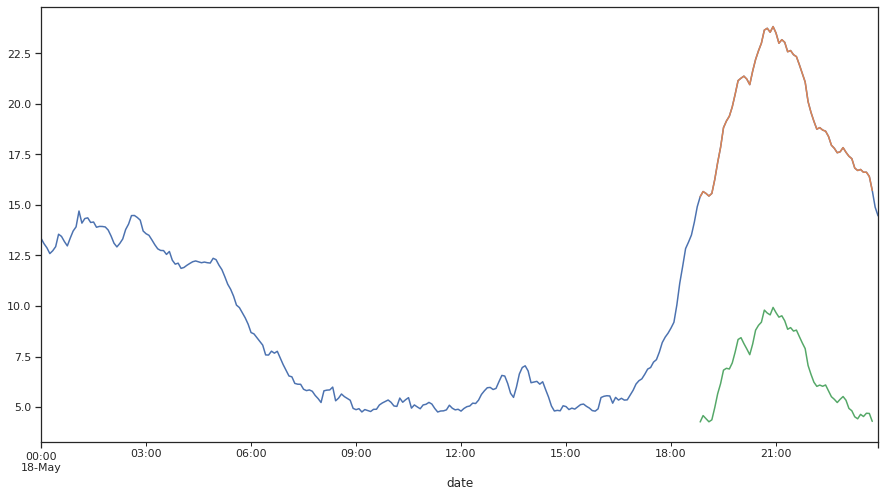

In [14]:
plt.figure(figsize=(15,8))
data['2019-05-18'].P1.plot()
anom_list[90].P1.plot()
anom_list[90].resid.plot()

In [80]:
anomdata = pd.DataFrame(index=[i for i in range(len(anom_list))])

In [81]:
# anomdata['positive'] = [int(np.mean(i.resid) > 0) for i in anom_list]
anomdata['resid'] = [i.resid.mean() for i in anom_list]
#anomdata['minutes'] = [len(i)*5 for i in anom_list]
anomdata['max_P1'] = [i.P1.max() for i in anom_list]
anomdata['min_P1'] = [i.P1.min() for i in anom_list]
anomdata['change_P1'] = [i.P1.max()-i.P1.min() for i in anom_list]
anomdata['change_P2'] = [i.P2.max()-i.P2.min() for i in anom_list]
anomdata['mean_hum'] = [i.humidity.mean() for i in anom_list]
anomdata['change_hum'] = [i.humidity.max()-i.humidity.min() for i in anom_list]
anomdata['mean_temp'] = [i.temperature.mean() for i in anom_list]
anomdata['change_temp'] = [i.temperature.max()-i.temperature.min() for i in anom_list]
anomdata['prec'] = [i.precipitation.mean() for i in anom_list]
anomdata['prec_change'] = [i.precipitation.max() - i.precipitation.min() for i in anom_list]
anomdata['prec_amount'] = [i.prec_amount.mean() for i in anom_list]

In [82]:
anomdata.head()

,resid,max_P1,min_P1,change_P1,change_P2,mean_hum,change_hum,mean_temp,change_temp,prec,prec_change,prec_amount
0,5.689688,5.414762,3.010760,2.404002,3.171024,50.314649,24.73125,6.410166,5.173333,0.0,0.0,0.1
1,-4.894408,3.848393,1.831154,2.017239,1.424643,69.908733,7.54000,2.835033,0.461250,0.0,0.0,0.1
2,6.437447,15.113750,6.920964,8.192786,16.162976,50.456983,13.00375,5.300983,2.843750,0.0,0.0,0.1
3,4.692320,20.088662,18.363661,1.725001,2.548643,47.832333,9.79375,4.438667,3.845000,0.0,0.0,0.1
4,5.889660,20.681305,13.683287,6.998018,3.577143,34.368237,11.16625,8.526058,3.440000,0.0,0.0,0.0


In [83]:
#g = sns.pairplot(anomdata)

In [84]:
pca = PCA(n_components=3)
pca.fit(anomdata)
X = pca.transform(anomdata)

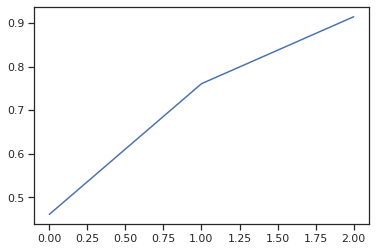

In [85]:
plt.plot(1-pca.explained_variance_ratio_)

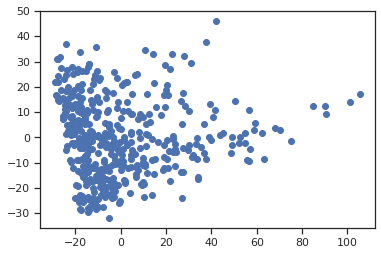

In [86]:
plt.scatter(X[:,0], X[:,1])

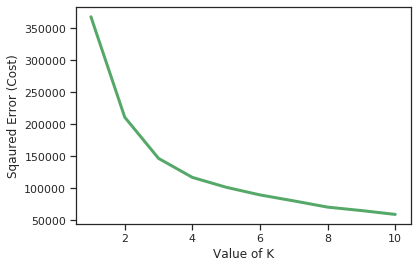

In [87]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [88]:
KM = KMeans(n_clusters = 5, random_state=42)
KM.fit(X)
anomdata['cluster'] = KM.labels_

In [89]:
anomdata.cluster.value_counts()

0    168
4    117
3     60
1     51
2     30
Name: cluster, dtype: int64

In [90]:
anomdata.groupby(['cluster']).mean()

,resid,max_P1,min_P1,change_P1,change_P2,mean_hum,change_hum,mean_temp,change_temp,prec,prec_change,prec_amount
cluster,,,,,,,,,,,,
0,-1.549574,12.261248,8.327326,3.933921,3.169553,64.841636,8.106073,14.380024,2.423893,0.729315,0.553571,0.493584
1,4.747440,32.738785,26.196469,6.542315,4.671764,43.425303,8.130920,14.441395,2.964017,0.359153,0.235294,0.114104
2,11.736362,68.838149,44.691981,24.146168,11.229086,68.760650,5.877898,12.759579,1.943748,0.866411,0.533333,0.606505
3,4.712436,35.396623,26.168795,9.227828,6.497476,69.731257,7.103542,13.992048,2.603675,0.566752,0.500000,0.288527
4,-3.639206,12.346922,8.253739,4.093183,2.680838,37.341805,9.474645,21.692340,4.296691,0.184909,0.162393,0.191094


In [91]:
anomdata.mean()

resid           0.447984
max_P1         21.979106
min_P1         15.520153
change_P1       6.458953
change_P2       4.251465
mean_hum       55.689604
change_hum      8.186808
mean_temp      16.226923
change_temp     2.994424
prec            0.522238
prec_change     0.399061
prec_amount     0.344146
cluster         1.781690
dtype: float64

In [92]:
data.columns

Index(['P1', 'P2', 'pressure', 'temperature', 'humidity', 'P1_std', 'P2_std',
       'pressure_std', 'temperature_std', 'humidity_std', 'temp_meteo',
       'pres_meteo', 'hum_meteo', 'wind_direction', 'wind_speed',
       'precipitation', 'prec_amount', 'visibility', 'dew_point_temp'],
      dtype='object')

In [93]:
data.prec_amount.dtype

dtype('float64')